# **Feature Selection technique -**
It is a core step in preparing data for machine learning where the goal is to identify and keep only the input features that contribute most to accurate predictions. By focusing on the most relevant variables, feature selection helps build models that are simpler, faster, less prone to overfitting and easier to interpret especially when we use datasets containing many features, some of which may be irrelevant or redundant.

In [ ]:
#Connecting to dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
#Using insurance dataset
df=pd.read_csv('/content/drive/MyDrive/Data Science_NG/Colab Notebooks/Datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,female,27.900,0,yes,South,16884.92400,0
1,18,male,33.770,1,no,South,1725.55230,1
2,28,male,33.000,3,no,South,4449.46200,0
3,33,male,22.705,0,no,North,21984.47061,0
4,32,male,28.880,0,no,North,3866.85520,0


In [ ]:
cat_col = ["sex","children","smoker","region"]

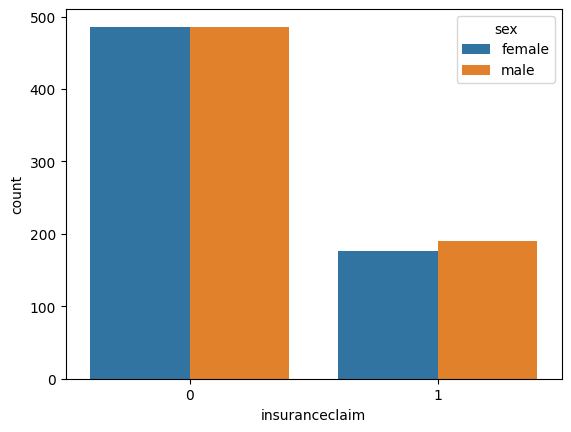

------------------------------------------


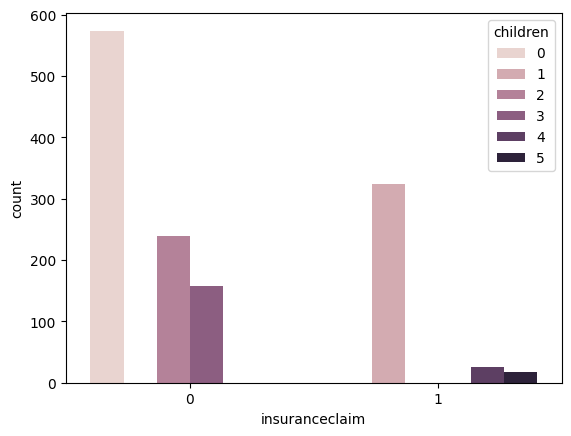

------------------------------------------


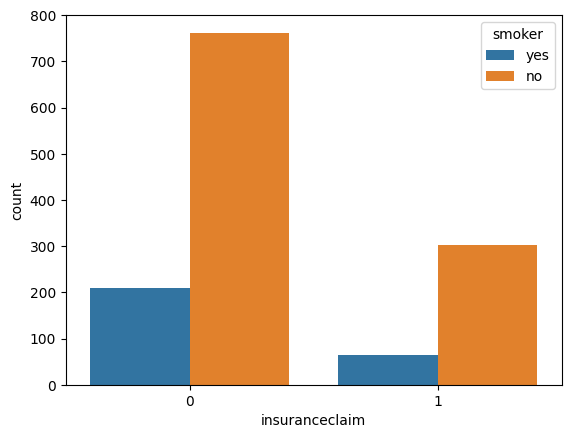

------------------------------------------


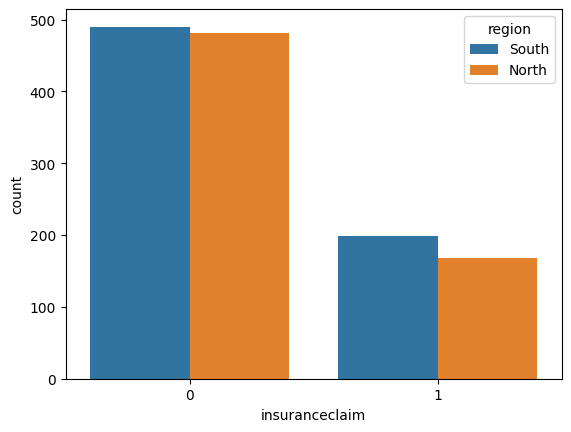

------------------------------------------


In [ ]:
for col in cat_col:
    plt.figure()
    sns.countplot(data=df,x="insuranceclaim", hue=col)
    plt.show()
    print("------------------------------------------")

# Smoker and Children columns might affect the target

In [ ]:
num_col = ["age","bmi","charges"]

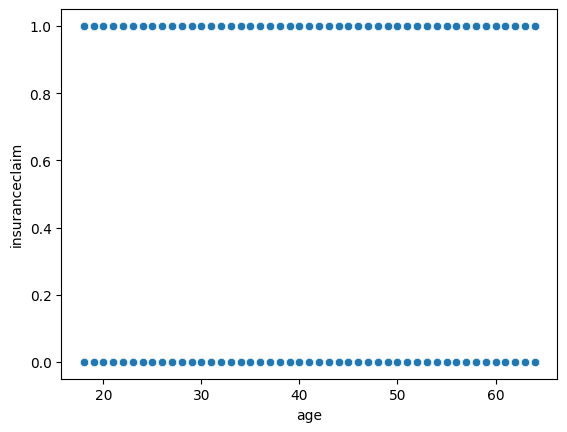

--------------------------------------------------------------------------


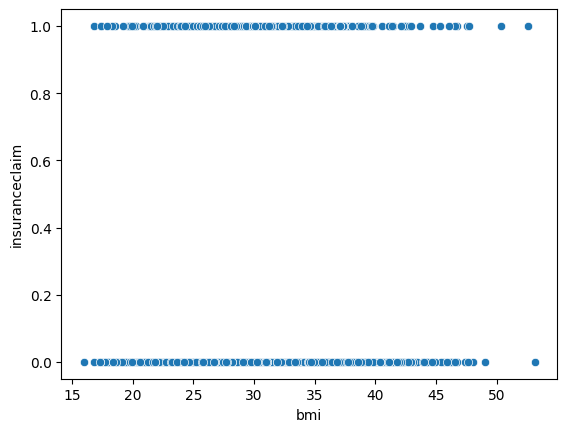

--------------------------------------------------------------------------


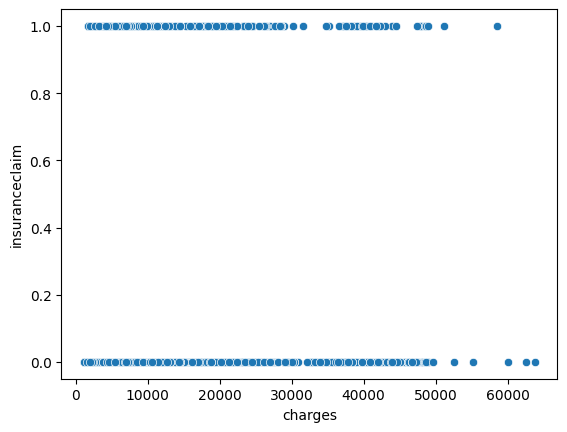

--------------------------------------------------------------------------


In [ ]:
for col in num_col:
    plt.figure()
    sns.scatterplot(data=df, x=col, y="insuranceclaim")
    plt.show()
    print("--------------------------------------------------------------------------")

# Charges and Bmi might affect the target</p>

# **Building Baseline Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score

In [ ]:
def train_model(X_train,X_test):
    log = LogisticRegression()
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    print(classification_report(y_test,y_pred))

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=["sex","smoker","region"], drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
train_model(X_train,X_test)

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       299
           1       0.40      0.02      0.04       103

    accuracy                           0.74       402
   macro avg       0.57      0.50      0.44       402
weighted avg       0.66      0.74      0.64       402



# **1. Filter Method**

In [ ]:
#chi2 method
from sklearn.feature_selection import chi2

# ANOVA method
from sklearn.feature_selection import f_regression

# common function for both
from sklearn.feature_selection import SelectKBest

## **chi2 test**

In [ ]:
chi2 = SelectKBest(score_func=chi2,k=5)

In [ ]:
X_train_chi = chi2.fit_transform(X_train,y_train)

X_test_chi = chi2.transform(X_test)

In [ ]:
train_model(X_train_chi,X_test_chi)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       299
           1       1.00      0.02      0.04       103

    accuracy                           0.75       402
   macro avg       0.87      0.51      0.45       402
weighted avg       0.81      0.75      0.65       402



In [ ]:
#Testing :
chi2.scores_

array([8.23011026e-01, 4.37432783e-01, 3.16132313e+01, 4.03935039e+04,
       3.71173711e-02, 1.82089025e+00, 1.54569406e+00])

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [ ]:
chi2.get_support()

array([ True, False,  True,  True, False,  True,  True])

# **Anova test**

In [ ]:
anova = SelectKBest(score_func=f_regression,k=4)

In [ ]:
X_train_f = anova.fit_transform(X_train,y_train)

X_test_f = anova.transform(X_test)

In [ ]:
train_model(X_train_f,X_test_f)

              precision    recall  f1-score   support

           0       0.75      1.00      0.85       299
           1       1.00      0.01      0.02       103

    accuracy                           0.75       402
   macro avg       0.87      0.50      0.44       402
weighted avg       0.81      0.75      0.64       402



In [ ]:
anova.scores_

array([ 0.16219671,  0.36186971, 23.93443516,  3.61481834,  0.0758653 ,
        2.29460257,  3.23365288])

In [ ]:
anova.get_support()

array([False, False,  True,  True, False,  True,  True])

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

# **Wrapper methods**

In [ ]:
features = df.columns.tolist()[:-1]

In [ ]:
features

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [ ]:
cols = []

In [ ]:
for col in features:
    cols.append(col)

    X = df[cols]
    y = df["insuranceclaim"]

    # Apply one-hot encoding to categorical columns before splitting
    X_encoded = pd.get_dummies(X, columns=["sex","smoker","region"], drop_first=True)


    X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.3,random_state=1)


    log = LogisticRegression()
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    print(col,"----> precision: ",precision_score(y_test,y_pred),"recall: ",recall_score(y_test,y_pred))

age ----> precision:  0.0 recall:  0.0
sex ----> precision:  0.0 recall:  0.0
bmi ----> precision:  0.0 recall:  0.0
children ----> precision:  1.0 recall:  0.019417475728155338
smoker ----> precision:  1.0 recall:  0.019417475728155338
region ----> precision:  1.0 recall:  0.02912621359223301
charges ----> precision:  0.4 recall:  0.019417475728155338


# **Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=["sex","smoker","region"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["sex","smoker","region"], drop_first=True)

In [ ]:
pca = PCA(n_components=5,random_state=1)

In [ ]:
X_train_pca = pca.fit_transform(X_train)

In [ ]:
X_test_pca = pca.transform(X_test)

In [ ]:
train_model(X_train_pca,X_test_pca)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       299
           1       1.00      0.02      0.04       103

    accuracy                           0.75       402
   macro avg       0.87      0.51      0.45       402
weighted avg       0.81      0.75      0.65       402



In [ ]:
components = pca.components_

In [ ]:
components[0]

array([3.47149728e-04, 9.76283845e-05, 3.28579817e-06, 9.99999935e-01,
       2.02993643e-06, 2.64211095e-05, 8.40331014e-07])

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [ ]:
components[1]

array([ 9.99308334e-01,  3.63104877e-02,  6.53971149e-04, -3.50245019e-04,
       -3.96492254e-04, -7.98074183e-03, -4.56386702e-05])

# **The END!!**